In [1]:
#PCA for visualization

#loading the data
import pandas as pd

data = pd.read_csv('iris.csv', names = ['sepal length','sepal width','petal length','petal width','target'])
data.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import numpy as np
type(np.array(data['target'].value_counts().index))

numpy.ndarray

In [3]:
data.shape

(150, 5)

In [4]:
attributes = ['sepal length','sepal width','petal length','petal width']
X = data.loc[:,attributes].values
y = data.loc[:,'target'].values

In [5]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

columns = ['pca 1', 'pca 2']
princi = pca.fit_transform(X)

df = pd.DataFrame (data = princi , columns = columns)
df.head()

,pca 1,pca 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [7]:
new_data = pd.concat([df,pd.DataFrame(y, columns = ['target'])], axis = 1)
new_data.head()

,pca 1,pca 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


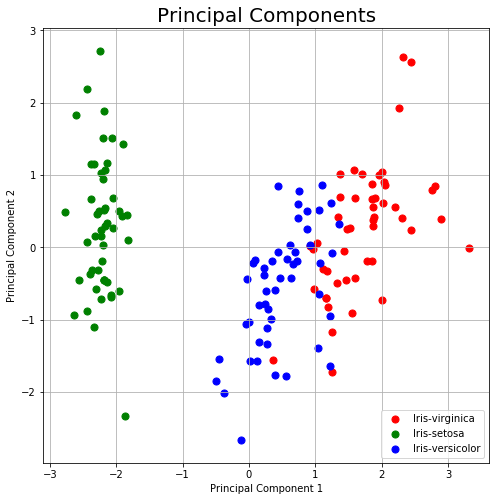

In [9]:
#visualising the plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Principal Components', fontsize = 20)

targets = np.array(new_data['target'].value_counts().index)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = new_data['target'] == target
    ax.scatter(new_data.loc[indicesToKeep, 'pca 1']
               , new_data.loc[indicesToKeep, 'pca 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [11]:
# This indicates that pca 1 explains about 73% and pca 2 explains about 23% of overall variance in data,which is about 96 % of the total variation. 
# This implies that we've lost about 4% of total variations


In [56]:
attributes = ['pca 1', 'pca 2']
X = new_data.loc[:,attributes].values
y = new_data.loc[:,'target'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)
y_train = y_train.reshape([-1])
y_test = y_test.reshape([-1])

In [57]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/Users/georgeboben/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/georgeboben/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logisticRegr.predict(X_test)
logisticRegr.score(X_test, y_test)

0.8

In [64]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

y_pred = neigh.predict(X_test)
neigh.score(X_test, y_test)

1.0

<Figure size 432x288 with 0 Axes>

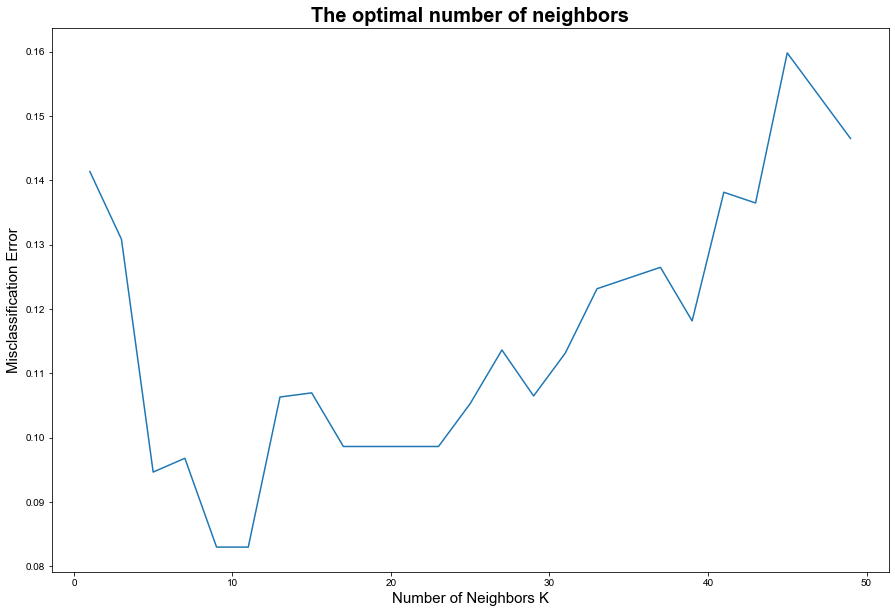

In [68]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [69]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
